# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# READ THE DATASET

In [2]:
data=pd.read_csv(r"C:\Users\AMAN SINGH\Downloads\FLOWER.csv")
print(data)

     SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print("Shape of data",data.shape)

Shape of data (150, 5)


In [5]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [7]:
data.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

# Data Visualization

<Axes: >

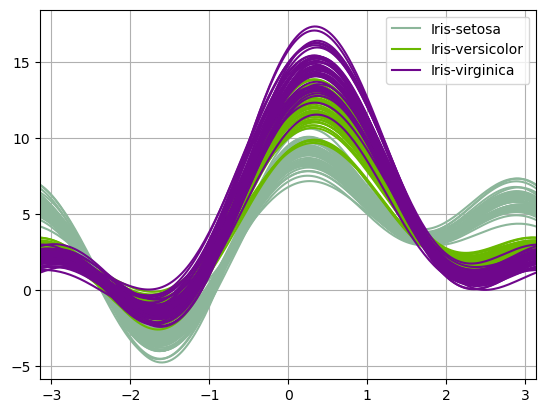

In [9]:
%matplotlib inline
from pandas.plotting import andrews_curves

andrews_curves(data, 'Name')

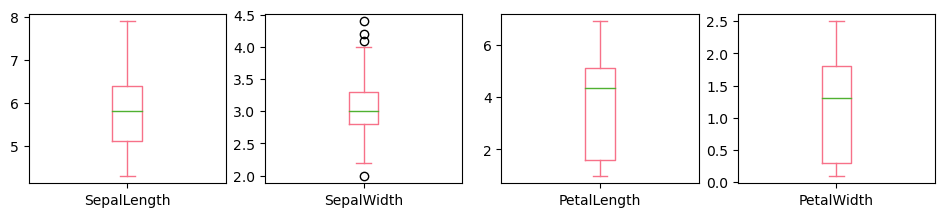

In [10]:
data.plot(kind='box', subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(30,26))
plt.show()

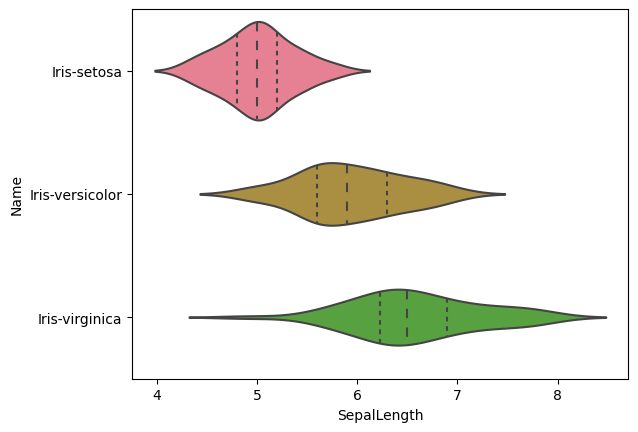

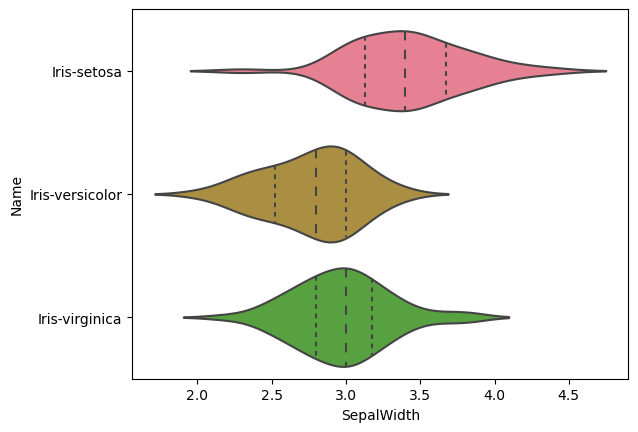

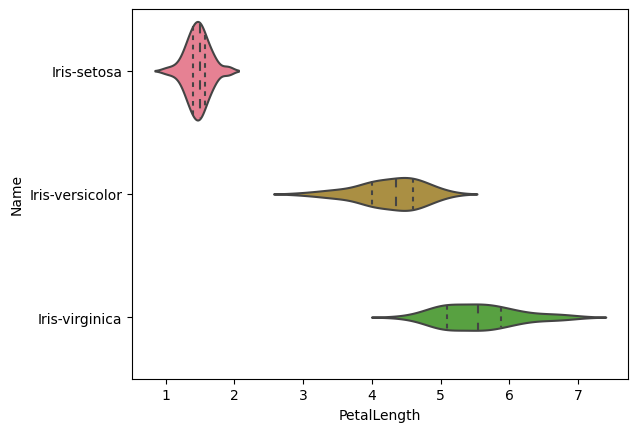

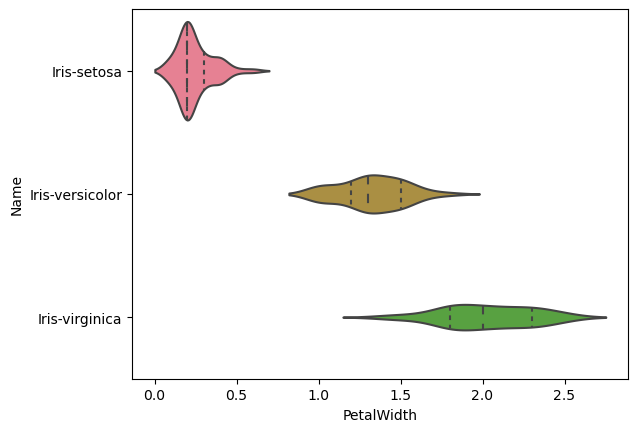

In [12]:
g = sns.violinplot(y='Name', x='SepalLength', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Name', x='SepalWidth', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Name', x='PetalLength', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Name', x='PetalWidth', data=data, inner='quartile')
plt.show()

C:\Users\AMAN SINGH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


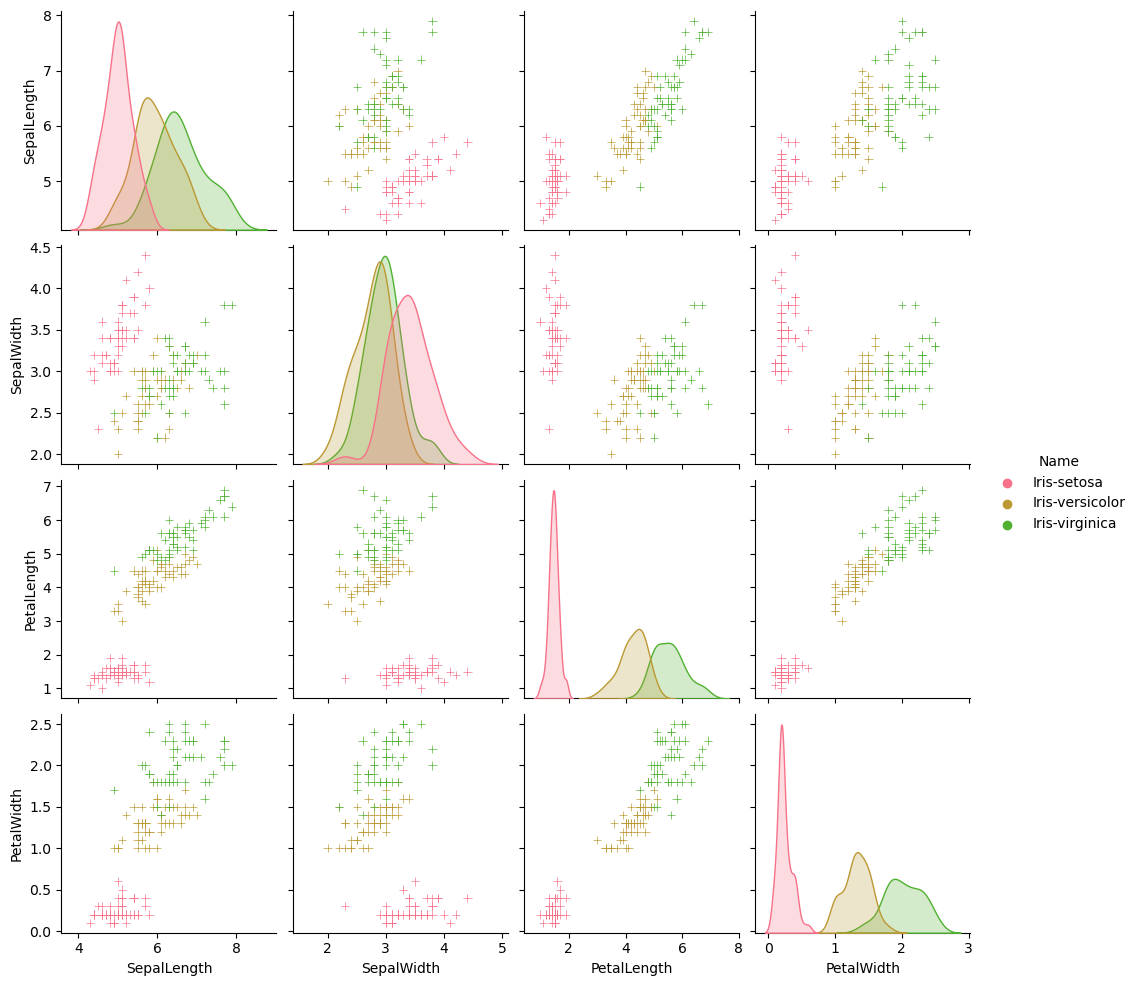

In [13]:
g = sns.pairplot(data, hue='Name', markers='+')
plt.show()

C:\Users\AMAN SINGH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


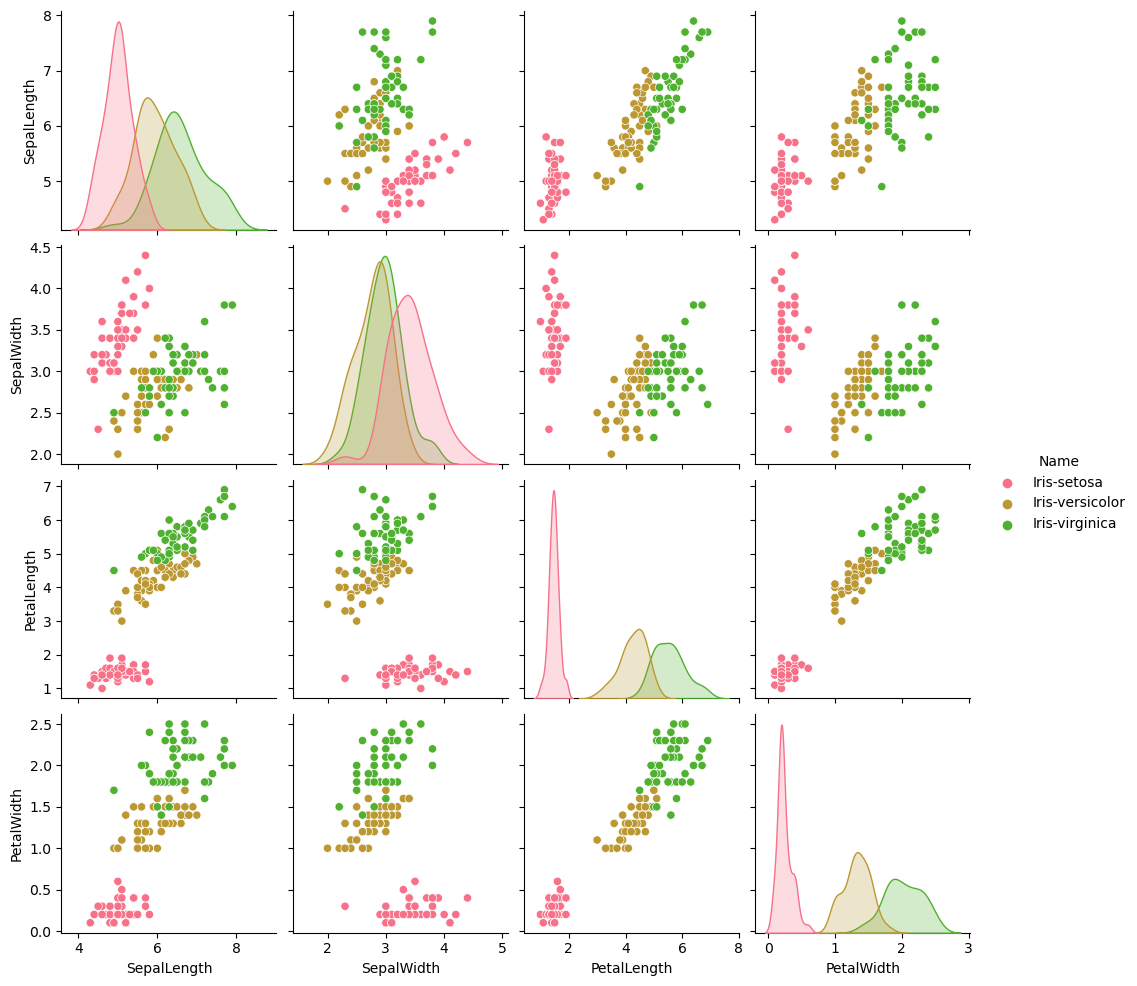

In [15]:
sns.pairplot(data,hue='Name');

In [16]:
data['Name'].value_counts()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [17]:
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
X = data.drop(['Name'], axis=1)
y = data['Name']
print(X.head() , '\n')
print(X.shape  , '\n')
print(y.head() , '\n')
print(y.shape  , '\n')

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2 

(150, 4) 

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object 

(150,) 



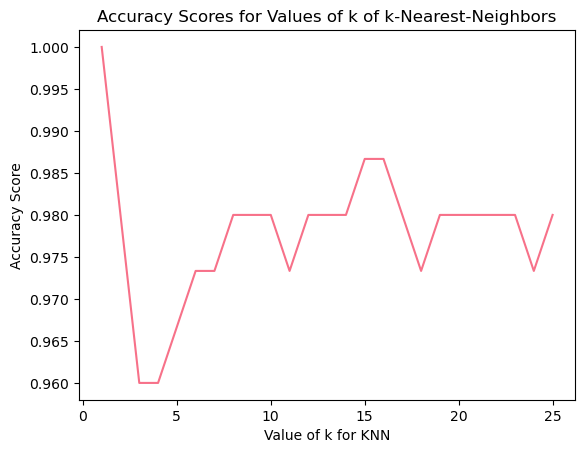

In [21]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y,y_pred))
    #if k == 3:
    #    print(knn , '\n')
    #    print(knn.fit(X,y), '\n')
    #    print(y_pred, '\n')
    #    print(scores, '\n')
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [22]:
logreg = LogisticRegression()
print(logreg, '\n')
logreg.fit(X,y)
print(logreg.fit(X,y), '\n')
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y,y_pred))

LogisticRegression() 

LogisticRegression() 

0.9733333333333334


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


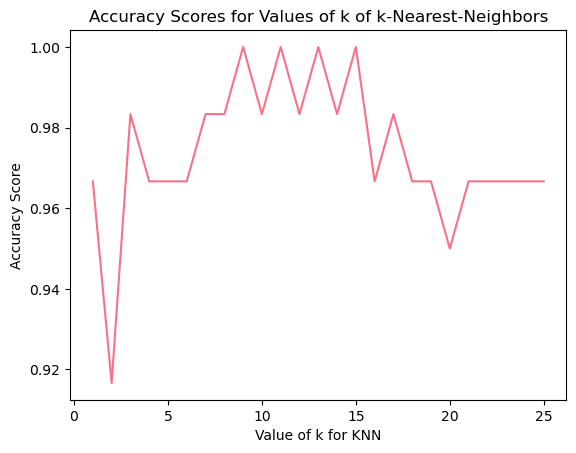

In [24]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [26]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=12)

In [27]:
knn.predict([[6, 3, 4, 2]]) 

C:\Users\AMAN SINGH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [28]:
train, test = train_test_split(data, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [32]:
train_X = train[['SepalLength', 'SepalWidth', 'PetalLength',
                 'PetalWidth']]
train_y = train.Name

test_X = test[['SepalLength', 'SepalWidth', 'PetalLength',
                 'PetalWidth']]
test_y = test.Name

In [33]:
train_X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
148,6.2,3.4,5.4,2.3
146,6.3,2.5,5.0,1.9
51,6.4,3.2,4.5,1.5
125,7.2,3.2,6.0,1.8
108,6.7,2.5,5.8,1.8


In [34]:
test_y.head()

131     Iris-virginica
37         Iris-setosa
7          Iris-setosa
98     Iris-versicolor
24         Iris-setosa
Name: Name, dtype: object

In [35]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9473684210526315
